In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib.pylab as pylab

In [2]:
! ls ../csv/error_over_p/

0_D512_reps1000.csv                   ctr_abs_randn_d16_D1024_reps1000.csv
45_D512_reps1000.csv                  ctr_abs_randn_d256_D1024_reps1000.csv
D128_reps100.csv                      ctr_abs_randn_d2_D1024_reps1000.csv
D128_reps1000.csv                     ctr_abs_randn_d32_D1024_reps1000.csv
D5000_reps100.csv                     ctr_abs_randn_d4_D1024_reps1000.csv
D64_reps100.csv                       ctr_abs_randn_d512_D1024_reps1000.csv
abs_randn_D512_reps1000.csv           ctr_abs_randn_d64_D1024_reps1000.csv
abs_randn_d16_D1024_reps1000.csv      ctr_abs_randn_d8_D1024_reps1000.csv
abs_randn_d2_D1024_reps1000.csv       ones_D512_reps1000.csv
abs_randn_d32_D1024_reps1000.csv      ones_d16_D1024_reps1000.csv
abs_randn_d32_D128_reps1000.csv       ones_d2_D1024_reps1000.csv
abs_randn_d32_D16_reps1000.csv        ones_d32_D1024_reps1000.csv
abs_randn_d32_D256_reps1000.csv       ones_d32_D128_reps1000.csv
abs_randn_d32_D2_reps1000.csv         ones_d32_D16_reps1000.csv
abs_randn_d32_

In [26]:
plt.cm.tab20(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [88]:
real_df.columns

Index(['name', 'p', 'proj', 'full_cov', 'complex_weights', 'complex_real',
       'ahle', 'tree', 'mae', 'mse', 'abs_err_std', 'abs_sq_err_std'],
      dtype='object')

In [2]:
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (16, 4), # 2.2*len(csvs)
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large',
    'xtick.major.size': 7.0,
    'ytick.major.size': 3.0
}
pylab.rcParams.update(params)

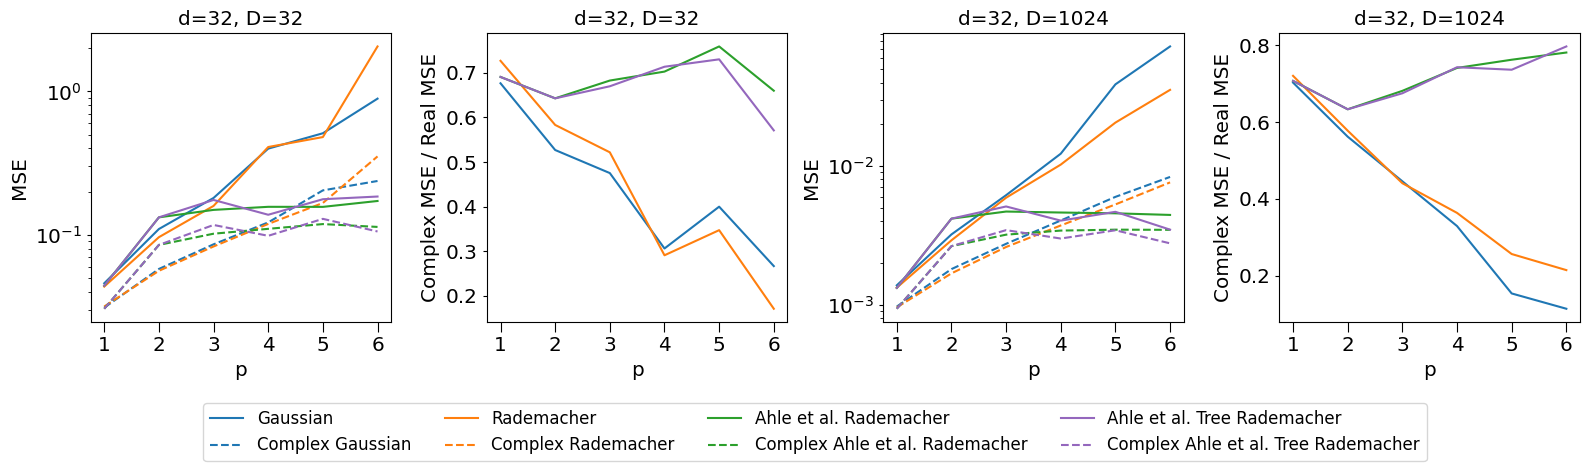

In [141]:
configs = [
    {'proj': 'gaussian', 'ahle': False, 'tree': False, 'color': plt.cm.tab20(0)},
    {'proj': 'rademacher', 'ahle': False, 'tree': False, 'color': plt.cm.tab20(2)},
    {'proj': 'rademacher', 'ahle': True, 'tree': False, 'color': plt.cm.tab20(4)},
    {'proj': 'rademacher', 'ahle': True, 'tree': True, 'color': plt.cm.tab20(8)},
]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

settings = ['abs_randn_d32_D32_reps1000', 'abs_randn_d32_D1024_reps1000']

for setting in settings:
    df = pd.read_csv(f'../csv/error_over_p/{setting}.csv')
    offset = 2 if setting == settings[1] else 0
    
    for config in configs:
        sub_df = df.loc[(df['proj']==config['proj']) & (df['ahle']==config['ahle']) & (df['tree']==config['tree'])]
        sub_df = sub_df.loc[df['p'] <= 6]

        
        # real
        real_df = sub_df[sub_df['complex_weights'] == False]
        complex_df = sub_df[sub_df['complex_weights'] == True]

        name = complex_df['name'].iloc[0]
        if 'comp' in name.lower():
            name = name.replace(' Comp.', '')
            name = name.replace('Complex ', '')
            name = 'Complex ' + name

        ax[offset+0].plot(real_df['p'], real_df['mse'], label=real_df['name'].iloc[0], color=config['color'])
        ax[offset+0].plot(complex_df['p'], complex_df['mse'], label=name, color=config['color'], linestyle='dashed')
        ax[offset+1].plot(real_df['p'], complex_df['mse'].values / real_df['mse'].values, label=real_df['name'].iloc[0], color=config['color'])
    ax[offset+0].set_yscale('log')
    ax[offset+0].set_xticks(np.arange(1,7))
    #ax[offset+0].legend()
    ax[offset+0].set_xlabel('p')
    ax[offset+0].set_ylabel('MSE')
    ax[0].set_title('d=32, D=32')
    ax[1].set_title('d=32, D=32')
    ax[offset+1].set_xticks(np.arange(1,7))
    #ax[offset+1].legend()
    ax[offset+1].set_xlabel('p')
    ax[offset+1].set_ylabel('Complex MSE / Real MSE')
    ax[2].set_title('d=32, D=1024')
    ax[3].set_title('d=32, D=1024')

plt.tight_layout()
handles, labels = ax[0].get_legend_handles_labels()
legend = plt.figlegend(handles=handles, labels=labels, loc='upper center', ncol=4, bbox_to_anchor = (0,-0.85,1.025,0.85), bbox_transform=plt.gcf().transFigure)
# plt.savefig('../figures/error_over_p_comp.pdf', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

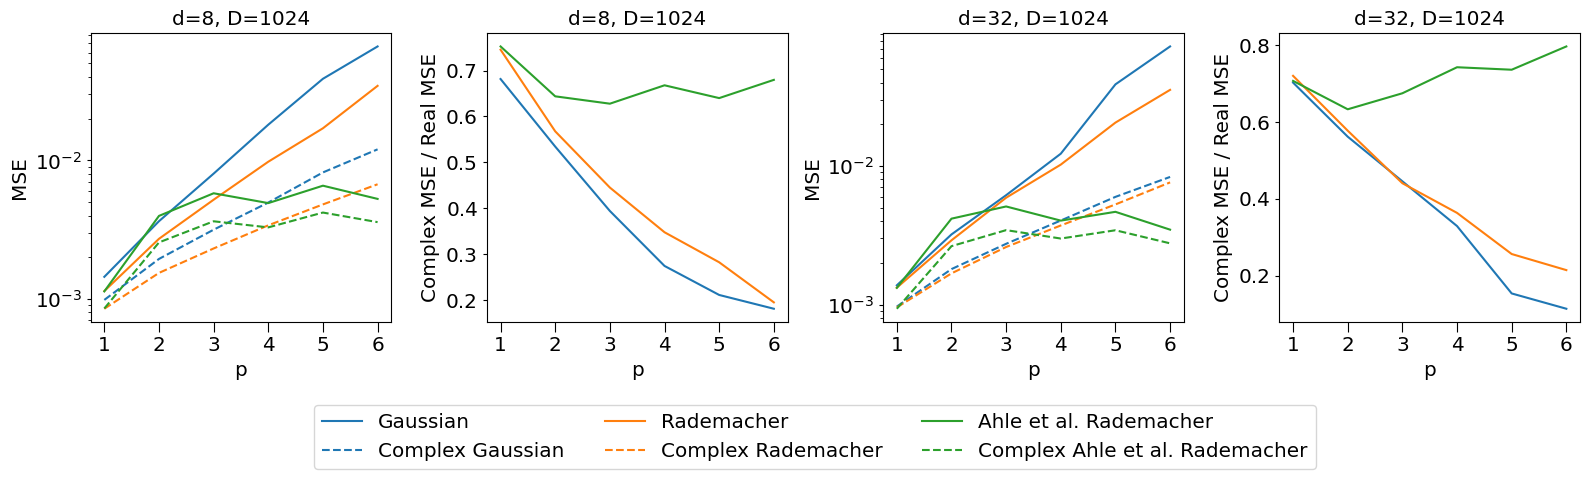

In [9]:
configs = [
    {'proj': 'gaussian', 'ahle': False, 'tree': False, 'color': plt.cm.tab20(0)},
    {'proj': 'rademacher', 'ahle': False, 'tree': False, 'color': plt.cm.tab20(2)},
    # {'proj': 'rademacher', 'ahle': True, 'tree': False, 'color': plt.cm.tab20(4)},
    {'proj': 'rademacher', 'ahle': True, 'tree': True, 'color': plt.cm.tab20(4)},
]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

settings = ['abs_randn_d8_D1024_reps1000', 'abs_randn_d32_D1024_reps1000']

for setting in settings:
    df = pd.read_csv(f'../csv/error_over_p/{setting}.csv')
    offset = 2 if setting == settings[1] else 0
    
    for config in configs:
        sub_df = df.loc[(df['proj']==config['proj']) & (df['ahle']==config['ahle']) & (df['tree']==config['tree'])]
        sub_df = sub_df.loc[df['p'] <= 6]

        
        # real
        real_df = sub_df[sub_df['complex_weights'] == False]
        complex_df = sub_df[sub_df['complex_weights'] == True]

        real_name = real_df['name'].iloc[0]
        real_name = real_name.replace(' Tree', '')
        complex_name = complex_df['name'].iloc[0]
        complex_name = complex_name.replace(' Tree', '')
        
        if 'comp' in name.lower():
            complex_name = complex_name.replace(' Comp.', '')
            complex_name = complex_name.replace('Complex ', '')
            complex_name = 'Complex ' + complex_name

        ax[offset+0].plot(real_df['p'], real_df['mse'], label=real_name, color=config['color'])
        ax[offset+0].plot(complex_df['p'], complex_df['mse'], label=complex_name, color=config['color'], linestyle='dashed')
        ax[offset+1].plot(real_df['p'], complex_df['mse'].values / real_df['mse'].values, label=real_df['name'].iloc[0], color=config['color'])
    ax[offset+0].set_yscale('log')
    ax[offset+0].set_xticks(np.arange(1,7))
    #ax[offset+0].legend()
    ax[offset+0].set_xlabel('p')
    ax[offset+0].set_ylabel('MSE')
    ax[0].set_title('d=8, D=1024')
    ax[1].set_title('d=8, D=1024')
    ax[offset+1].set_xticks(np.arange(1,7))
    #ax[offset+1].legend()
    ax[offset+1].set_xlabel('p')
    ax[offset+1].set_ylabel('Complex MSE / Real MSE')
    ax[2].set_title('d=32, D=1024')
    ax[3].set_title('d=32, D=1024')

plt.tight_layout()
handles, labels = ax[0].get_legend_handles_labels()
legend = plt.figlegend(handles=handles, labels=labels, loc='upper center', ncol=3, bbox_to_anchor = (0,-0.85,1.025,0.85), bbox_transform=plt.gcf().transFigure)
plt.savefig('../figures/error_over_p_comp.pdf', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

In [ ]:
# storyline:
# for p=2,3 use complex Rademacher over Ahles method

In [105]:
'comp' in 'Comp.'.lower()

True

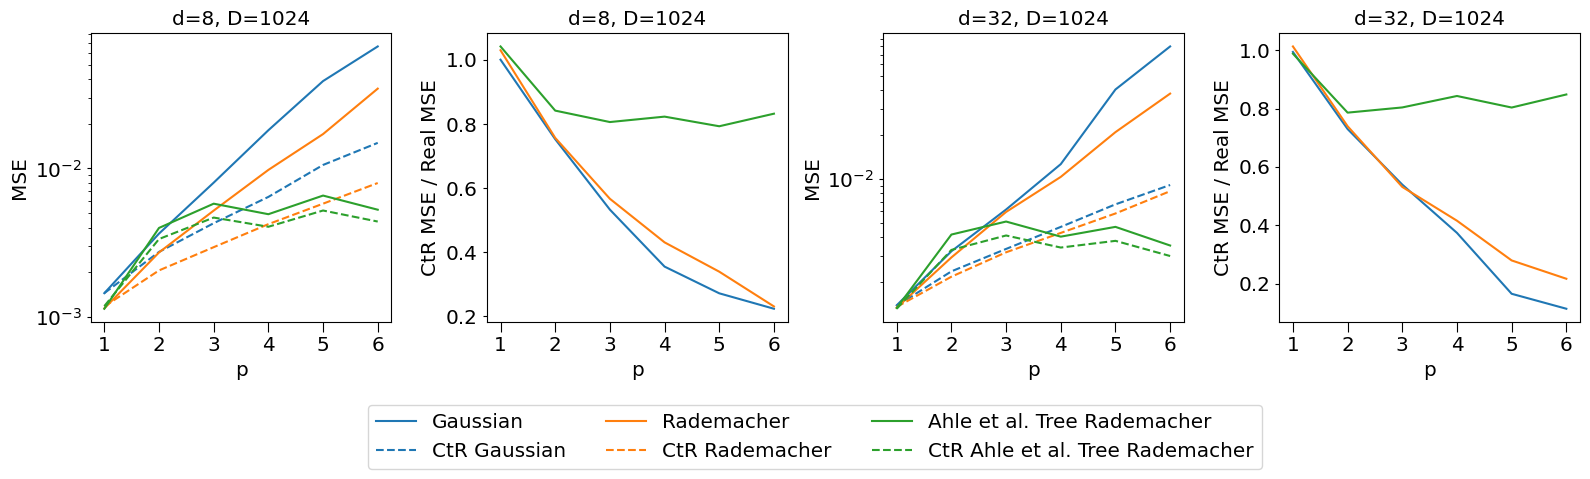

In [14]:
configs = [
    {'proj': 'gaussian', 'ahle': False, 'tree': False, 'color': plt.cm.tab20(0)},
    {'proj': 'rademacher', 'ahle': False, 'tree': False, 'color': plt.cm.tab20(2)},
    # {'proj': 'rademacher', 'ahle': True, 'tree': False, 'color': plt.cm.tab20(4)},
    {'proj': 'rademacher', 'ahle': True, 'tree': True, 'color': plt.cm.tab20(4)},
]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

settings = ['ctr_abs_randn_d8_D1024_reps1000', 'ctr_abs_randn_d32_D1024_reps1000']

for setting in settings:
    df = pd.read_csv(f'../csv/error_over_p/{setting}.csv')
    offset = 2 if setting == settings[1] else 0
    
    for config in configs:
        sub_df = df.loc[(df['proj']==config['proj']) & (df['ahle']==config['ahle']) & (df['tree']==config['tree'])]
        sub_df = sub_df.loc[df['p'] <= 6]

        
        # real
        real_df = sub_df[sub_df['complex_weights'] == False]
        complex_df = sub_df[sub_df['complex_weights'] == True]

        name = complex_df['name'].iloc[0]
        if 'comp' in name.lower():
            name = name.replace(' Comp.', '')
            name = name.replace('Complex ', '')
            name = 'CtR ' + name

        ax[offset+0].plot(real_df['p'], real_df['mse'], label=real_df['name'].iloc[0], color=config['color'])
        ax[offset+0].plot(complex_df['p'], 2*complex_df['mse'], label=name, color=config['color'], linestyle='dashed')
        ax[offset+1].plot(real_df['p'], 2*complex_df['mse'].values / real_df['mse'].values, label=real_df['name'].iloc[0], color=config['color'])
    ax[offset+0].set_yscale('log')
    ax[offset+0].set_xticks(np.arange(1,7))
    #ax[offset+0].legend()
    ax[offset+0].set_xlabel('p')
    ax[offset+0].set_ylabel('MSE')
    ax[0].set_title('d=8, D=1024')
    ax[1].set_title('d=8, D=1024')
    ax[offset+1].set_xticks(np.arange(1,7))
    #ax[offset+1].legend()
    ax[offset+1].set_xlabel('p')
    ax[offset+1].set_ylabel('CtR MSE / Real MSE')
    ax[2].set_title('d=32, D=1024')
    ax[3].set_title('d=32, D=1024')

plt.tight_layout()
handles, labels = ax[0].get_legend_handles_labels()
legend = plt.figlegend(handles=handles, labels=labels, loc='upper center', ncol=3, bbox_to_anchor = (0,-0.85,1.025,0.85), bbox_transform=plt.gcf().transFigure)
plt.savefig('../figures/error_over_p_ctr.pdf', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

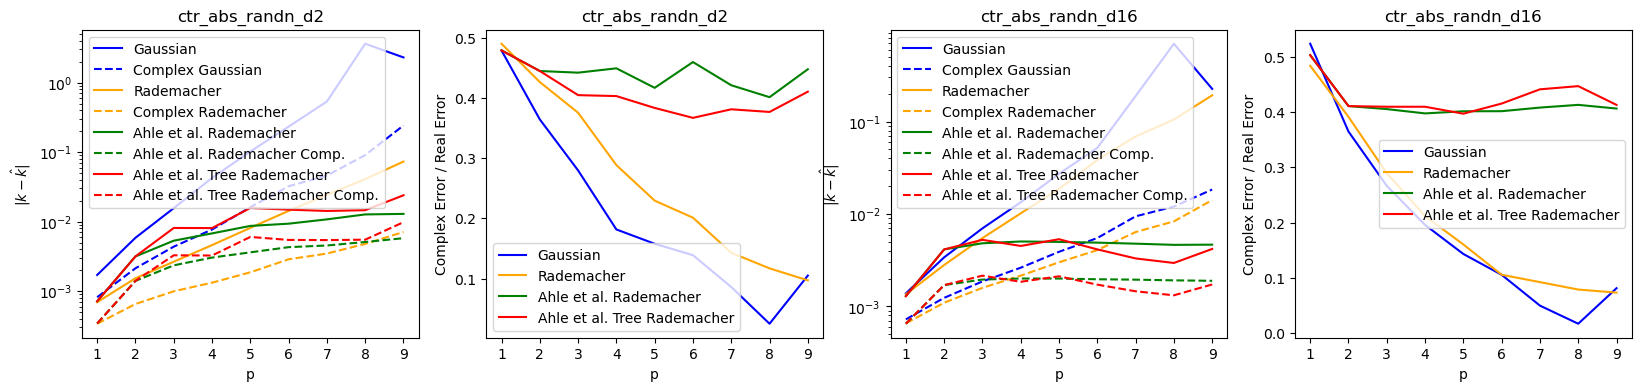

In [61]:
configs = [
    {'proj': 'gaussian', 'ahle': False, 'tree': False, 'color': 'blue'},
    {'proj': 'rademacher', 'ahle': False, 'tree': False, 'color': 'orange'},
    {'proj': 'rademacher', 'ahle': True, 'tree': False, 'color': 'green'},
    {'proj': 'rademacher', 'ahle': True, 'tree': True, 'color': 'red'},
]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

settings = ['ctr_abs_randn_d2', 'ctr_abs_randn_d16']

for setting in settings:
    df = pd.read_csv(f'../csv/error_over_p/{setting}_D1024_reps1000.csv')
    offset = 2 if setting == settings[1] else 0
    
    for config in configs:
        sub_df = df.loc[(df['proj']==config['proj']) & (df['ahle']==config['ahle']) & (df['tree']==config['tree'])]

        # real
        real_df = sub_df[sub_df['complex_weights'] == False]
        complex_df = sub_df[sub_df['complex_weights'] == True]

        ax[offset+0].plot(real_df['p'], real_df['mse'], label=real_df['name'].iloc[0], color=config['color'])
        ax[offset+0].plot(complex_df['p'], complex_df['mse'], label=complex_df['name'].iloc[0], color=config['color'], linestyle='dashed')
        ax[offset+1].plot(real_df['p'], complex_df['mse'].values / real_df['mse'].values, label=real_df['name'].iloc[0], color=config['color'])
    ax[offset+0].set_yscale('log')
    ax[offset+0].set_xticks(np.arange(1,10))
    ax[offset+0].legend()
    ax[offset+0].set_xlabel('p')
    ax[offset+0].set_ylabel(r'$|k - \hat{k}|$')
    ax[offset+0].set_title(setting)
    ax[offset+1].set_xticks(np.arange(1,10))
    ax[offset+1].legend()
    ax[offset+1].set_xlabel('p')
    ax[offset+1].set_ylabel('Complex Error / Real Error')
    ax[offset+1].set_title(setting)

plt.show()